# Modulation




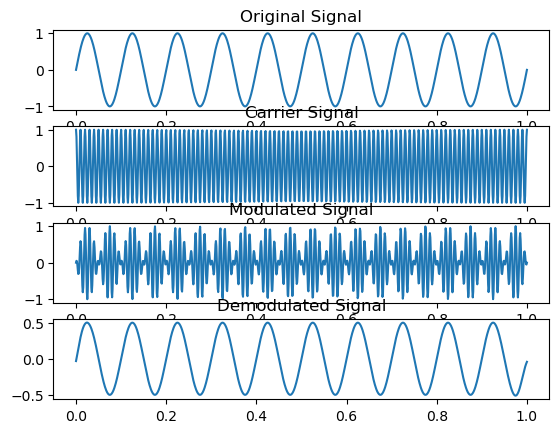

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 定义信号参数
Fs = 1000  # 采样频率
f = 10     # 信号频率
t = np.linspace(0, 1, Fs)  # 时间向量

# 生成原始信号
original_signal = np.sin(2 * np.pi * f * t)

# 幅度调制
carrier_freq = 100
carrier = np.cos(2 * np.pi * carrier_freq * t)
modulated_signal = original_signal * carrier

# 幅度解调
demodulated_signal = modulated_signal * carrier

# 低通滤波（移除高频成分）
from scipy.signal import butter, filtfilt

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# 应用低通滤波器
filtered_signal = butter_lowpass_filter(demodulated_signal, 30, Fs)

# 绘图
plt.figure()
plt.subplot(4,1,1)
plt.plot(t, original_signal)
plt.title('Original Signal')
plt.subplot(4,1,2)
plt.plot(t, carrier)
plt.title('Carrier Signal')
plt.subplot(4,1,3)
plt.plot(t, modulated_signal)
plt.title('Modulated Signal')
plt.subplot(4,1,4)
plt.plot(t, filtered_signal)
plt.title('Demodulated Signal')
plt.show()